In [6]:
# import intake
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import gribscan
import matplotlib.cm as cm

# Wave model WAM output from IFS

### Load wave data with open_zarr(), time, lon, lat

In [7]:
# json file was already prepared with gribscan-index and gribscan-build command line tools
resolution='tco2559-ng5'
gribfiles='wam_output/WAMc2' 
datapath='/work/bm1235/a270046/cycle2-sync/'+resolution+'/'+gribfiles
datazarr=datapath+'/json.dir/atm2d.json' # all wave data, this is the whole May
data = xr.open_zarr("reference::"+datazarr, consolidated=False)
#data = xr.open_zarr("reference::"+'/work/bm1235/a270046/cycle2-sync/'+resolution+'/wam_output/WAMc2/json.dir/atm2d.json', consolidated=False)




In [8]:
#note that there is currently no data before 2020-05-01. If you try to access data before that date, you may get only nans or simply an error.
data

<xarray.Dataset>
Dimensions:  (time: 6170, value: 2612294)
Coordinates:
    lat      (value) float64 dask.array<chunksize=(2612294,), meta=np.ndarray>
    lon      (value) float64 dask.array<chunksize=(2612294,), meta=np.ndarray>
  * time     (time) datetime64[ns] 2020-01-20 2020-01-20T01:00:00 ... 2021-01-01
Dimensions without coordinates: value
Data variables:
    cdww     (time, value) float64 dask.array<chunksize=(1, 2612294), meta=np.ndarray>
    dwi      (time, value) float64 dask.array<chunksize=(1, 2612294), meta=np.ndarray>
    mwd      (time, value) float64 dask.array<chunksize=(1, 2612294), meta=np.ndarray>
    mwp      (time, value) float64 dask.array<chunksize=(1, 2612294), meta=np.ndarray>
    pp1d     (time, value) float64 dask.array<chunksize=(1, 2612294), meta=np.ndarray>
    swh      (time, value) float64 dask.array<chunksize=(1, 2612294), meta=np.ndarray>
    wind     (time, value) float64 dask.array<chunksize=(1, 2612294), meta=np.ndarray>
Attributes:
    edition:            1
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          0
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part g

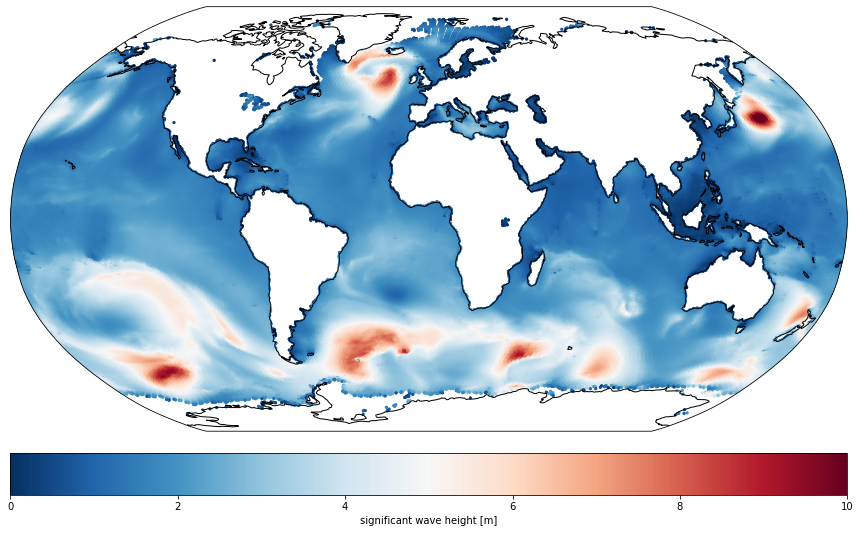

In [9]:
# sstep controls the spacing between points to plot
sstep=10 # (10 with s=4 e.g.)
#pick a certain 
data_sample=data.swh.sel(time='2020-05-01T00:00:00.000000000')
# plot using the simple scatter method:
plt.figure(figsize=(15,10))
# plot using Robinson projection.

ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution='110m', color='k')

sc=ax.scatter(data.lon[::sstep],data.lat[::sstep],c=data_sample[::sstep],s=5,cmap=cm.RdBu_r, transform=ccrs.PlateCarree(), vmin=0.,vmax=10.)
# Add colorbar
cbar=plt.colorbar(sc,orientation='horizontal', pad=0.04)
cbar.set_label('significant wave height [m]')
